In [1]:
!pip install catboost
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#machine learning Algorithms For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)


100%|██████████| 66.0M/66.0M [00:01<00:00, 49.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [3]:
data= pd.read_csv(os.path.join(path, 'creditcard.csv'))
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data .info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


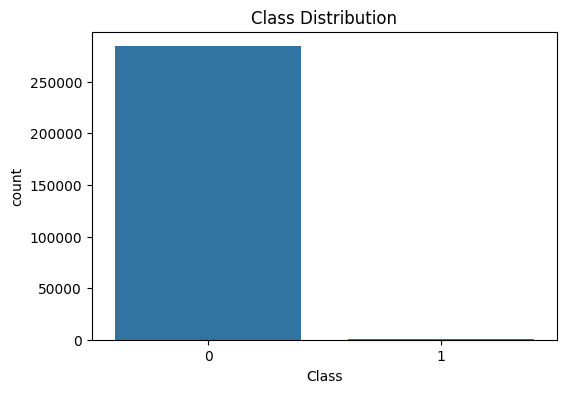

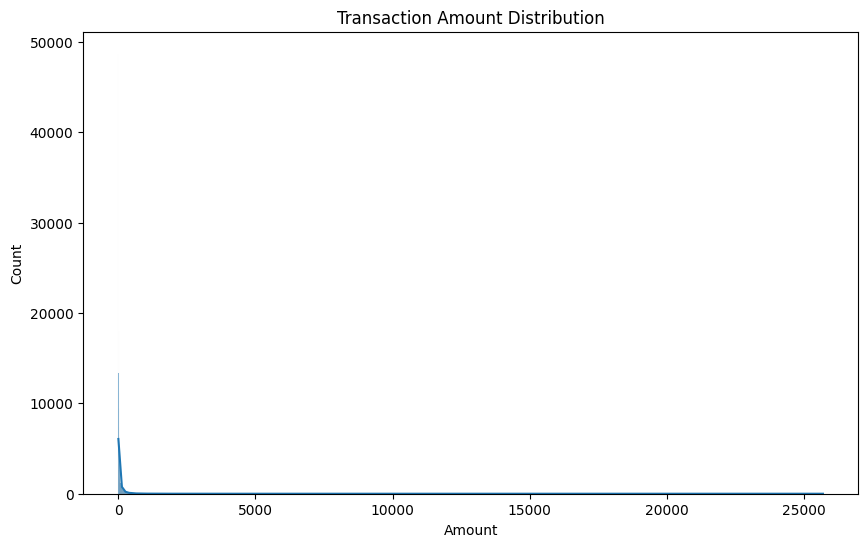

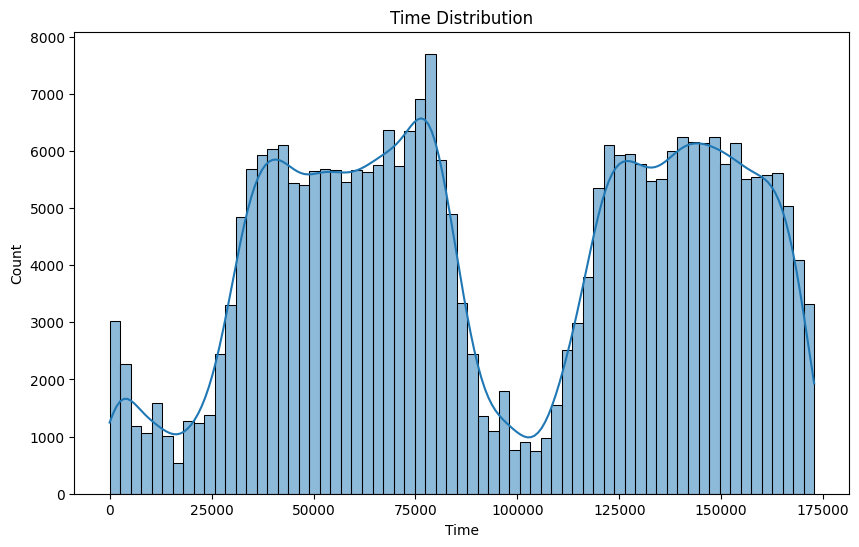

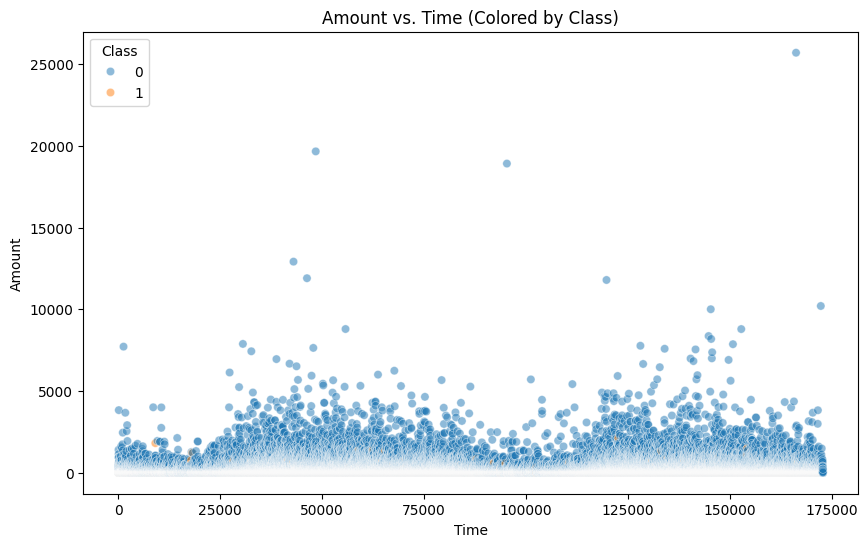

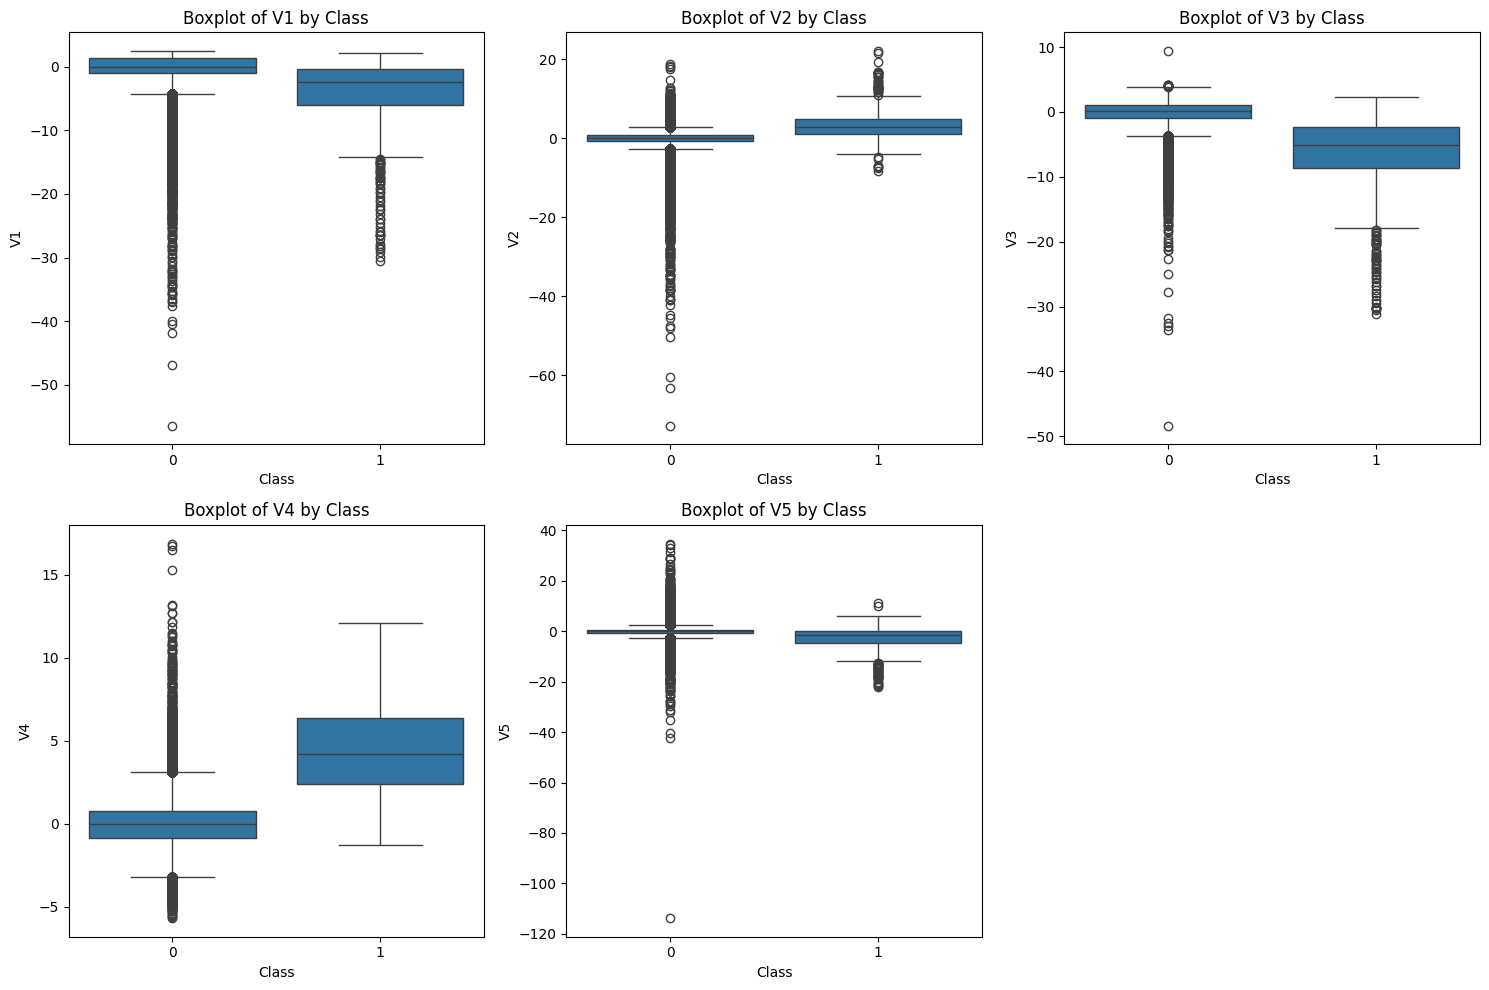

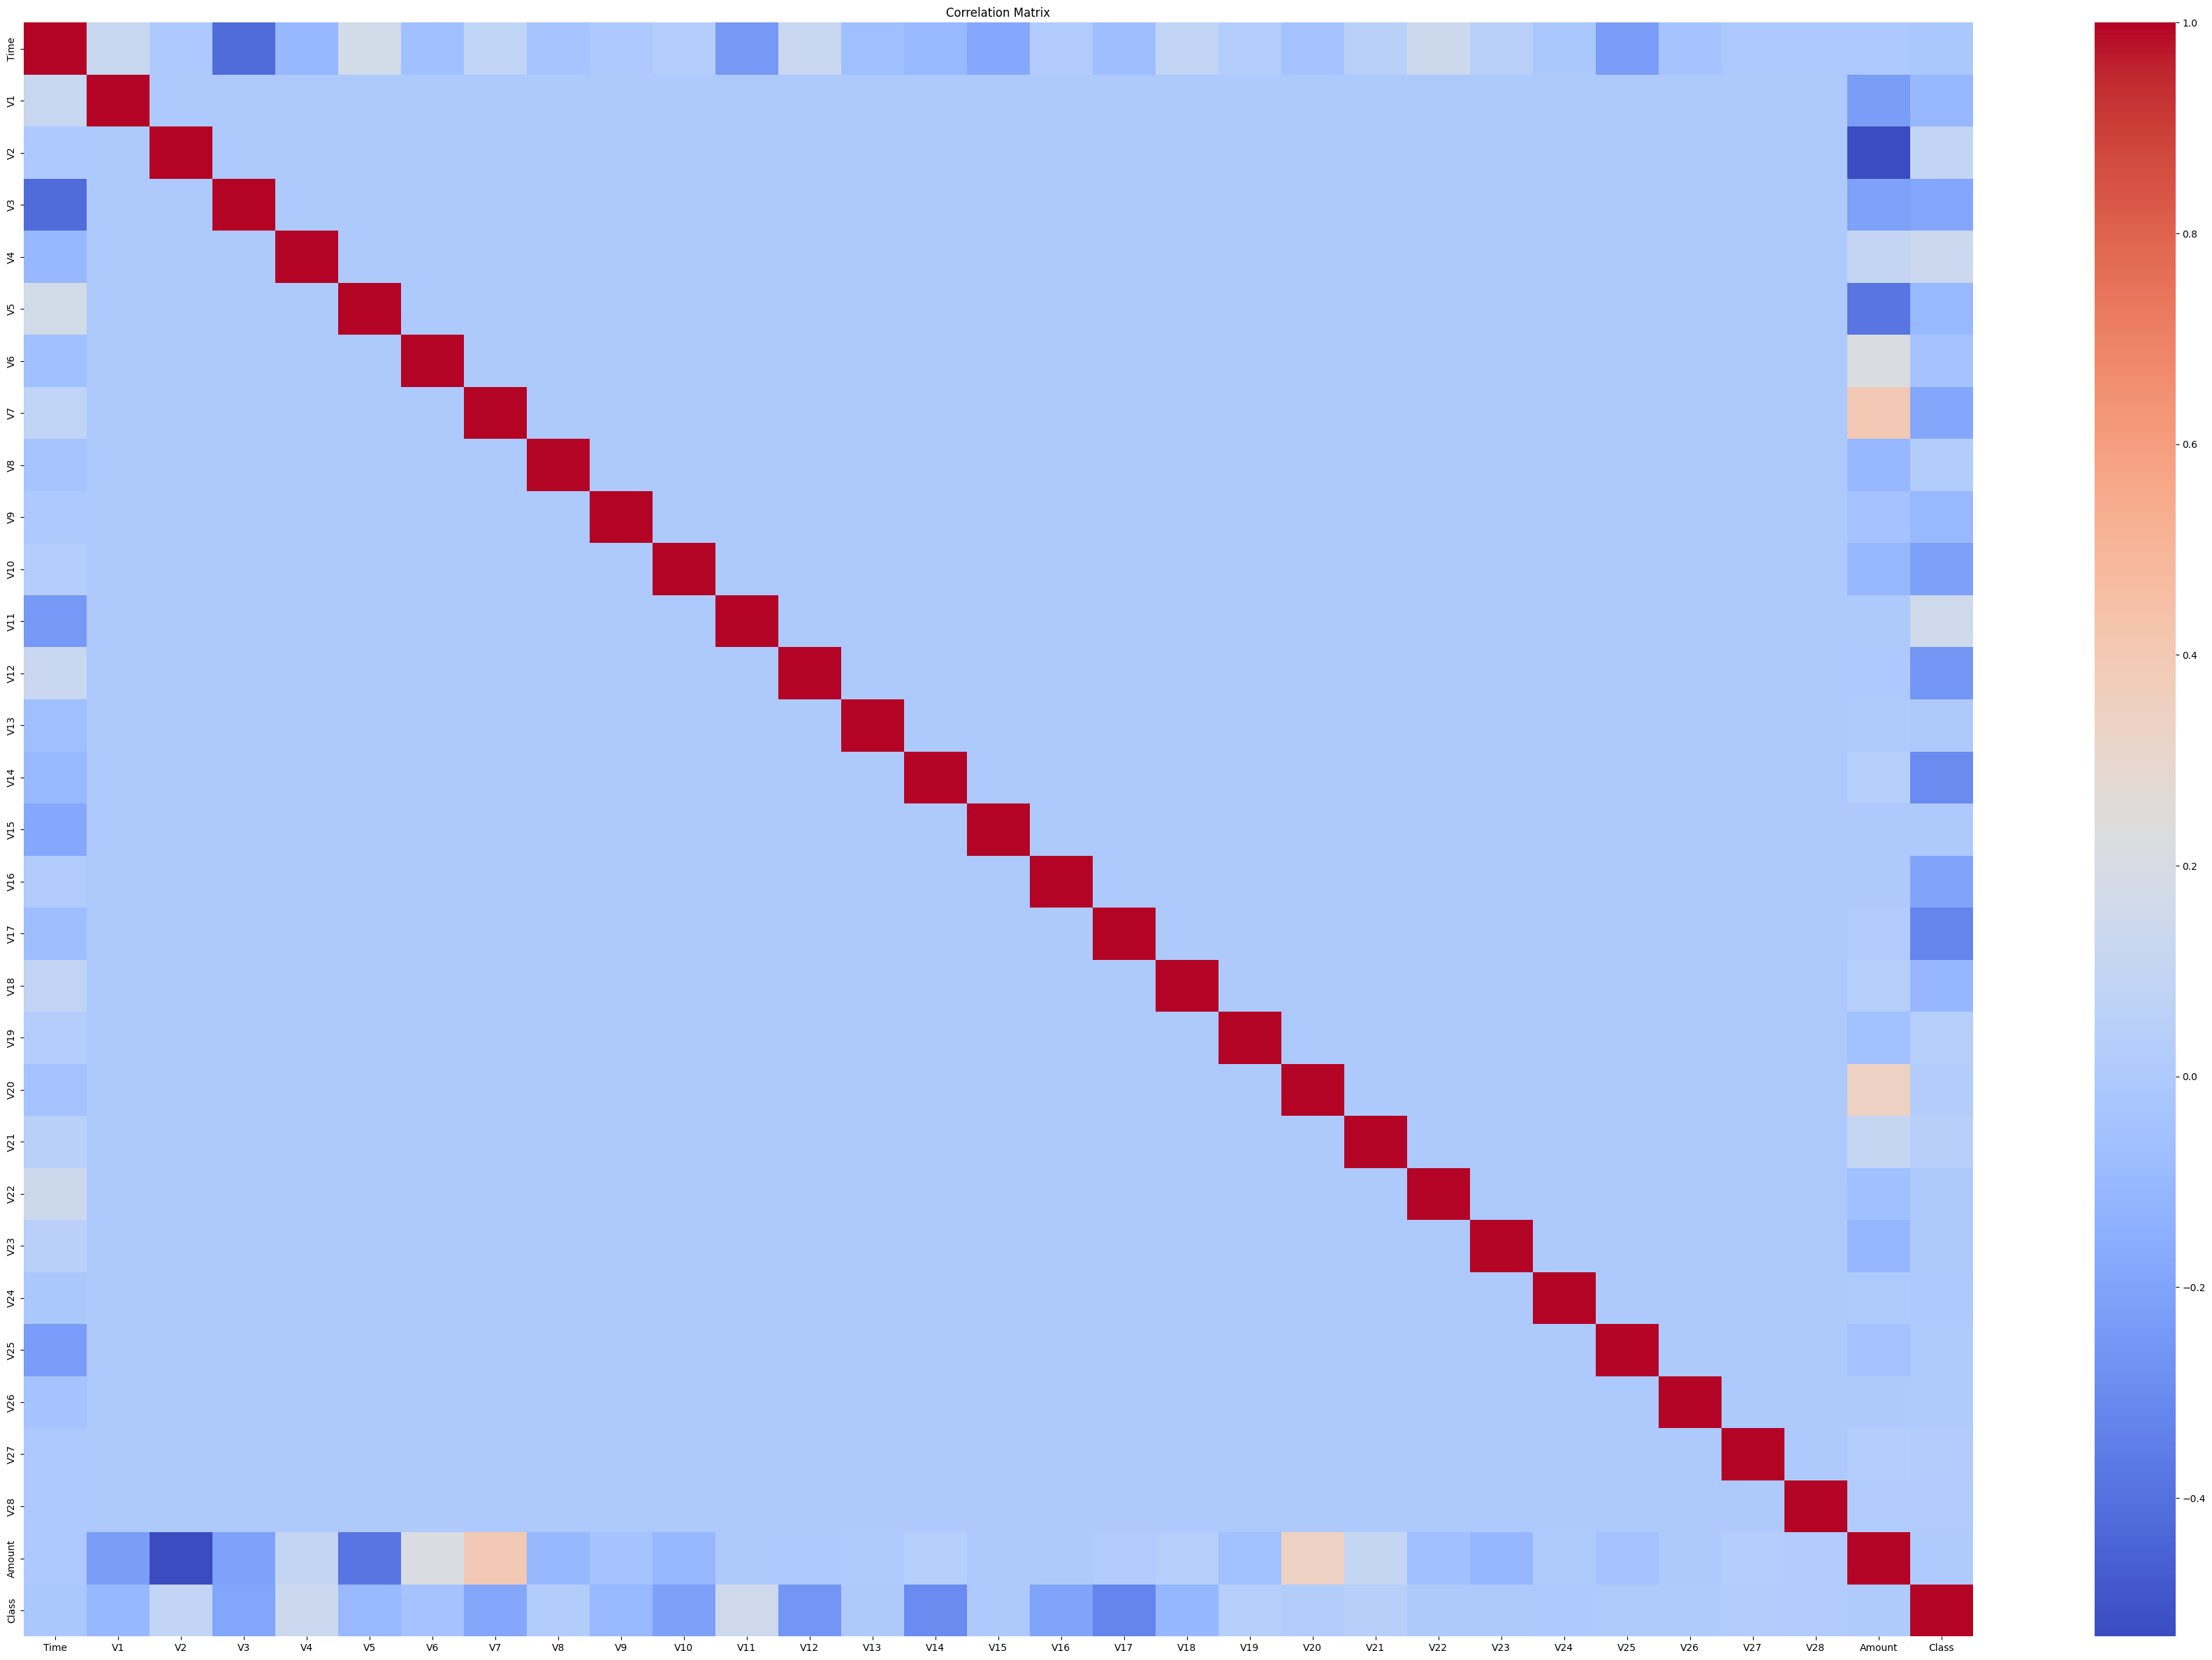

In [6]:

# Visualizations

# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# 2. Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# 3. Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], kde=True)
plt.title('Time Distribution')
plt.show()


# 4. Amount vs Time (colored by class)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, alpha=0.5)  # Adjust alpha for better visibility
plt.title('Amount vs. Time (Colored by Class)')
plt.show()

# 5. Boxplots of features for different classes (example with a few features)
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5'] # Adjust as needed
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot):
  plt.subplot(2, 3, i+1)  # Adjust subplot layout as needed
  sns.boxplot(x='Class', y=col, data=data)
  plt.title(f'Boxplot of {col} by Class')
plt.tight_layout() # Prevents overlap of titles
plt.show()


# 6. Correlation Heatmap (optional - may be computationally expensive)
plt.figure(figsize=(45, 30))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

In [8]:
# Scale 'Amount' and 'Time' using StandardScaler
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Dictionary of classification algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Baye": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),  # Suppress LightGBM logs
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)

}


Training Logistic Regression...
Saved Logistic Regression model to trained_models/Logistic Regression.joblib
Logistic Regression Metrics:
Accuracy: 0.9991
Precision: 0.9991
Recall: 0.9991
F1 Score: 0.9991
----------------------------------------
Training Decision Tree...
Saved Decision Tree model to trained_models/Decision Tree.joblib
Decision Tree Metrics:
Accuracy: 0.9991
Precision: 0.9991
Recall: 0.9991
F1 Score: 0.9991
----------------------------------------
Training Extra Trees...
Saved Extra Trees model to trained_models/Extra Trees.joblib
Extra Trees Metrics:
Accuracy: 0.9989
Precision: 0.9990
Recall: 0.9989
F1 Score: 0.9990
----------------------------------------
Training Random Forest...
Saved Random Forest model to trained_models/Random Forest.joblib
Random Forest Metrics:
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9996
F1 Score: 0.9995
----------------------------------------
Training SVC...
Saved SVC model to trained_models/SVC.joblib
SVC Metrics:
Accuracy: 0.9993
Preci

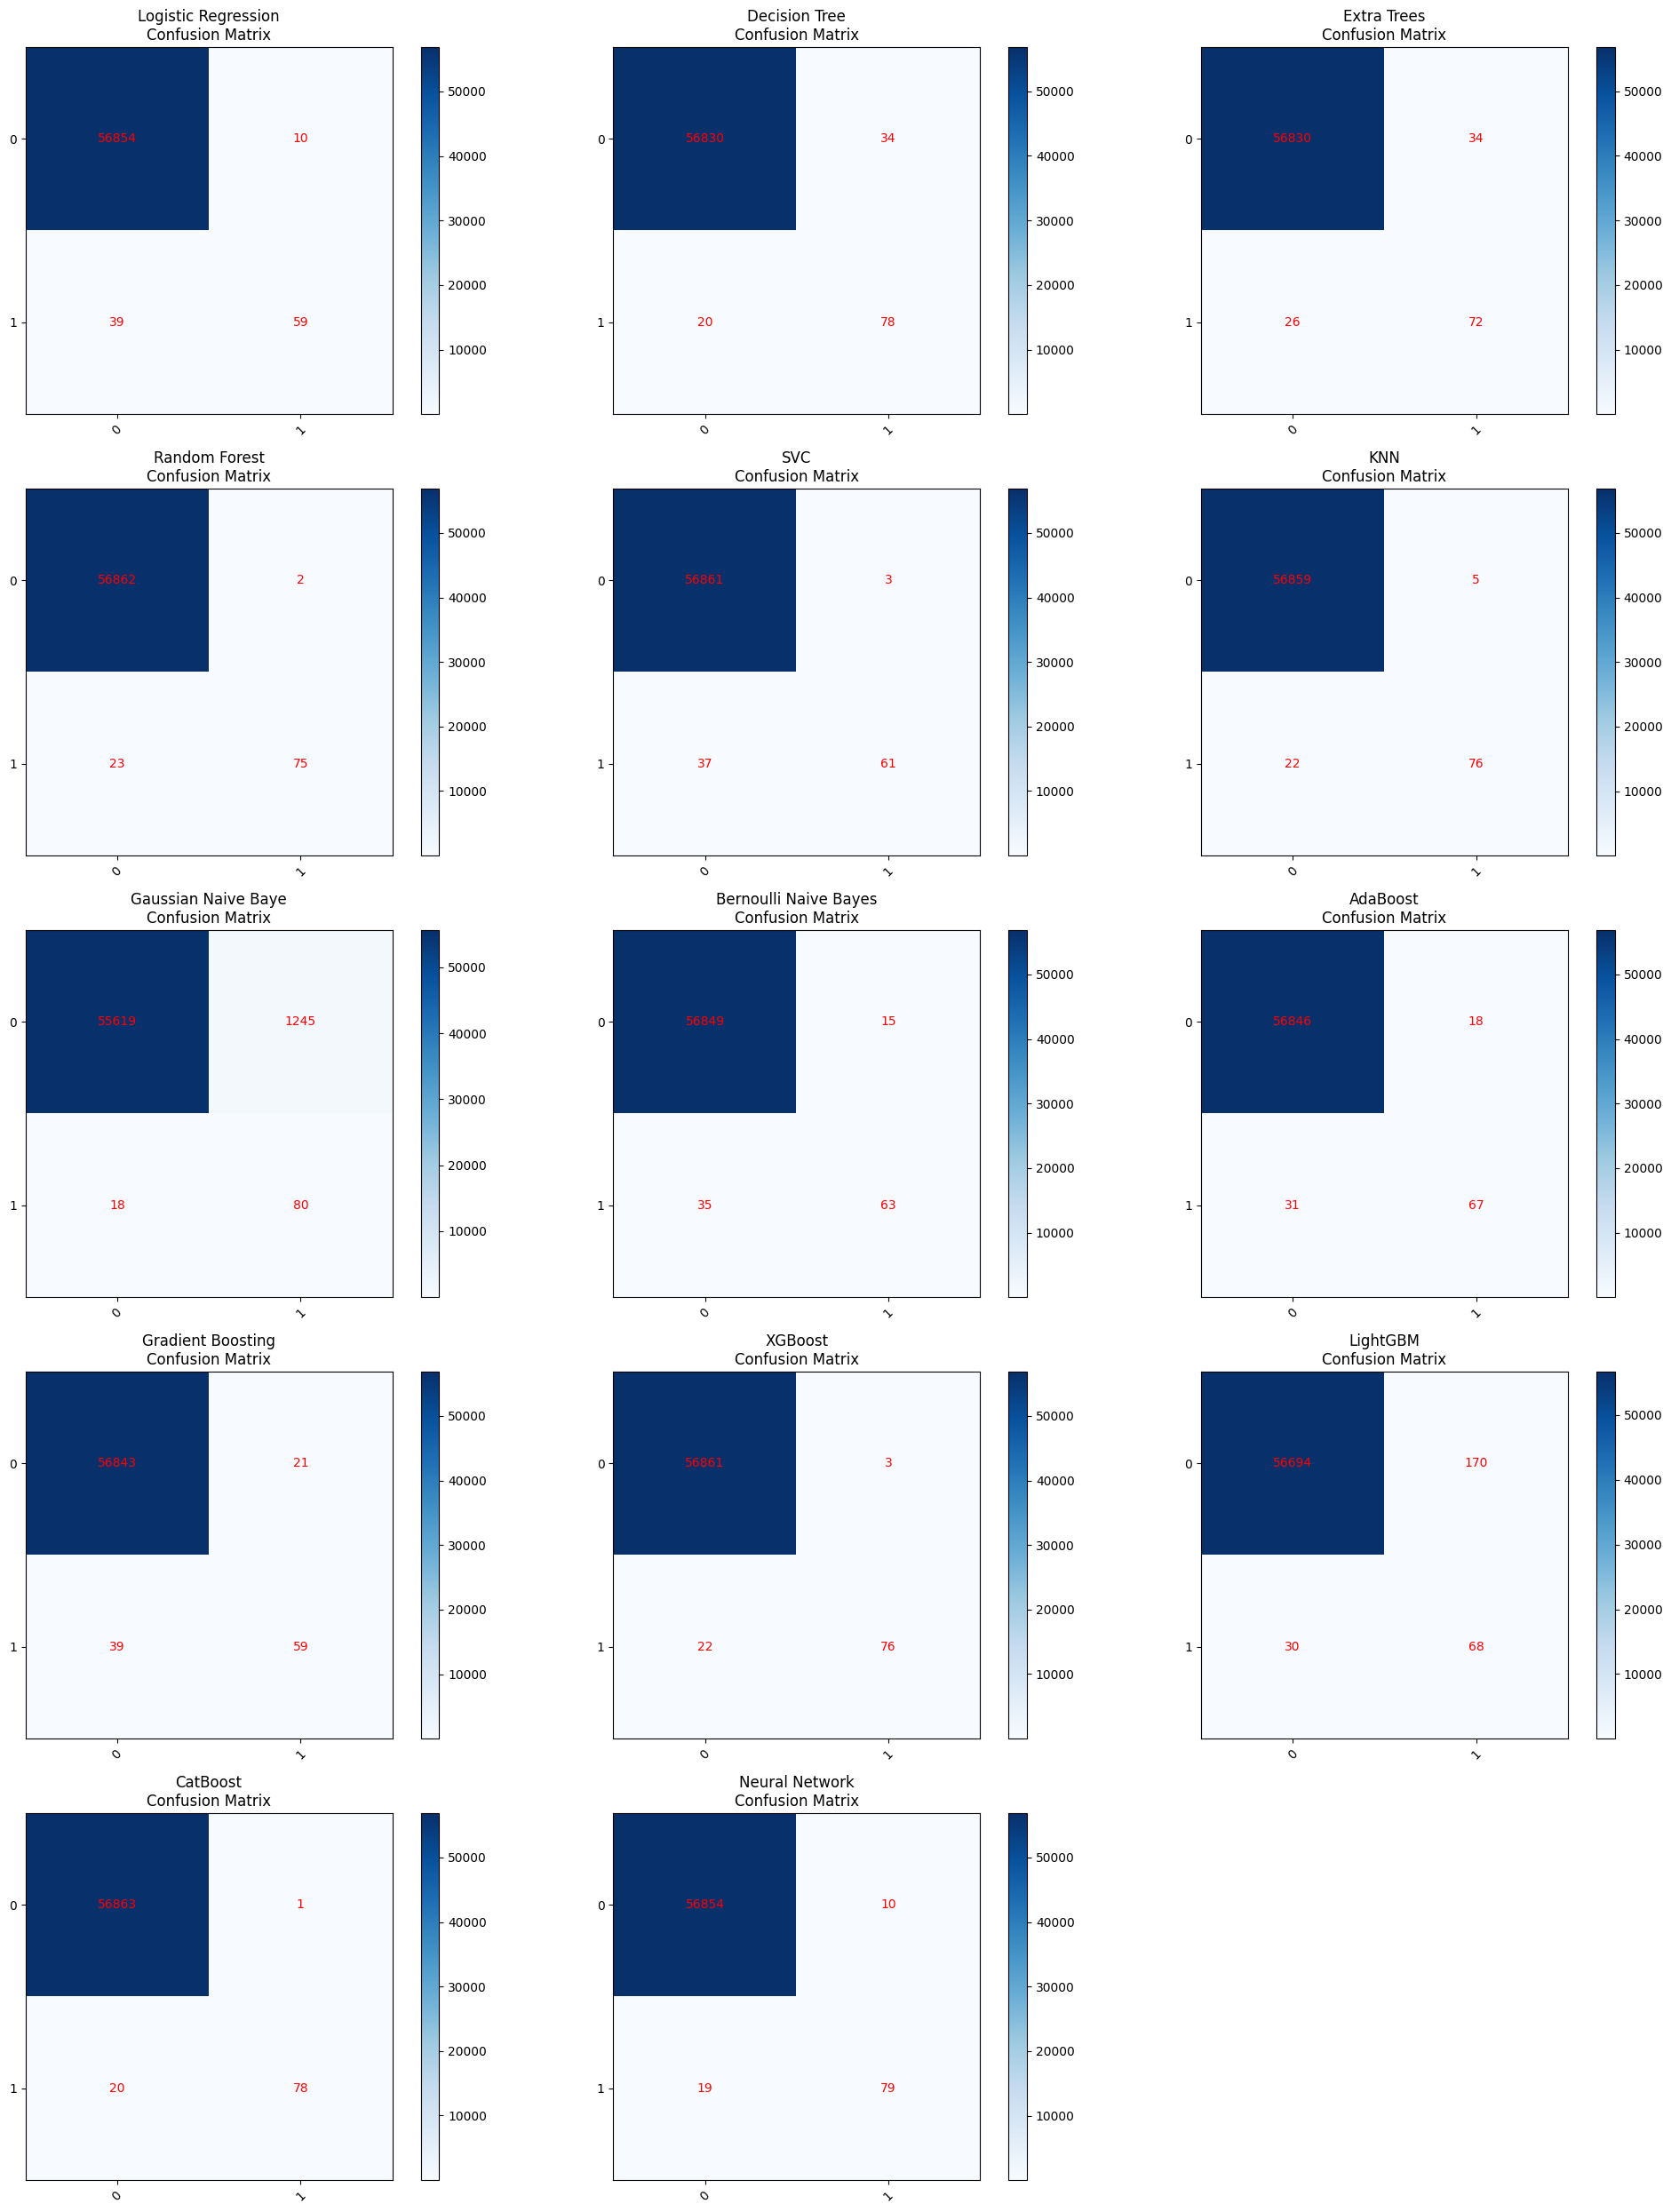

In [13]:
models_dir = 'trained_models'
os.makedirs(models_dir, exist_ok=True)

# Initialize a figure for confusion matrices
num_classifiers = len(classifiers)
num_rows = int(np.ceil(num_classifiers / 3))  # Adjust columns as needed
num_cols = 3  # You can adjust this for a different layout

# Initialize a figure with enough subplots
plt.figure(figsize=(20, num_rows * 5))  # Adjust figure height dynamically

# Dictionary to store results for all models
results = {}

# Train and evaluate each classifier
for i, (name, model) in enumerate(classifiers.items()):
    print(f"Training {name}...")


    y_train_adjusted = y_train
    y_test_adjusted = y_test

    # Fit the model
    model.fit(X_train, y_train_adjusted)

    # Save the trained model
    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test_adjusted, y_pred)
    precision = precision_score(y_test_adjusted, y_pred, average='weighted')
    recall = recall_score(y_test_adjusted, y_pred, average='weighted')
    f1 = f1_score(y_test_adjusted, y_pred, average='weighted')

    # Store metrics in the results dictionary
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": confusion_matrix(y_test_adjusted, y_pred)
    }

    # Print metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix in a subplot
    cm = results[name]["confusion_matrix"]
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name}\nConfusion Matrix")
    plt.colorbar()

    # Get the number of unique classes in the target variable
    num_classes = len(np.unique(y_test_adjusted))

    tick_marks = np.arange(num_classes)  # Use num_classes instead of hardcoding 7
    plt.xticks(tick_marks, np.unique(y_test_adjusted), rotation=45)  # Use unique class labels
    plt.yticks(tick_marks, np.unique(y_test_adjusted))  # Use unique class labels

    # Labeling the matrix - adjust loop ranges
    for j in range(cm.shape[0]):  # Iterate over actual classes (rows)
        for k in range(cm.shape[1]):  # Iterate over predicted classes (columns)
            plt.text(k, j, format(cm[j, k], 'd'), ha="center", va="center", color="red")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

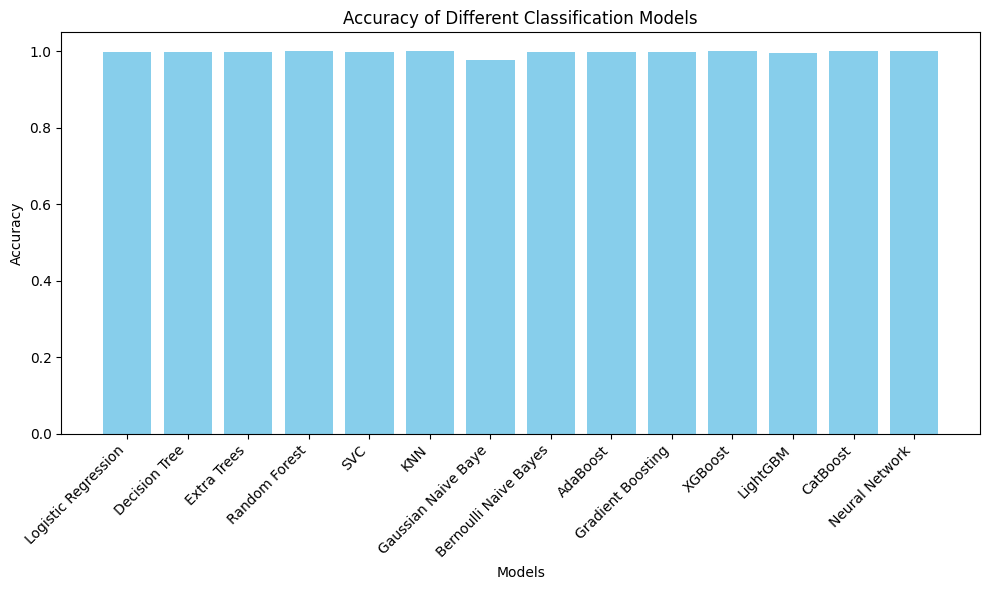

In [14]:
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classification Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

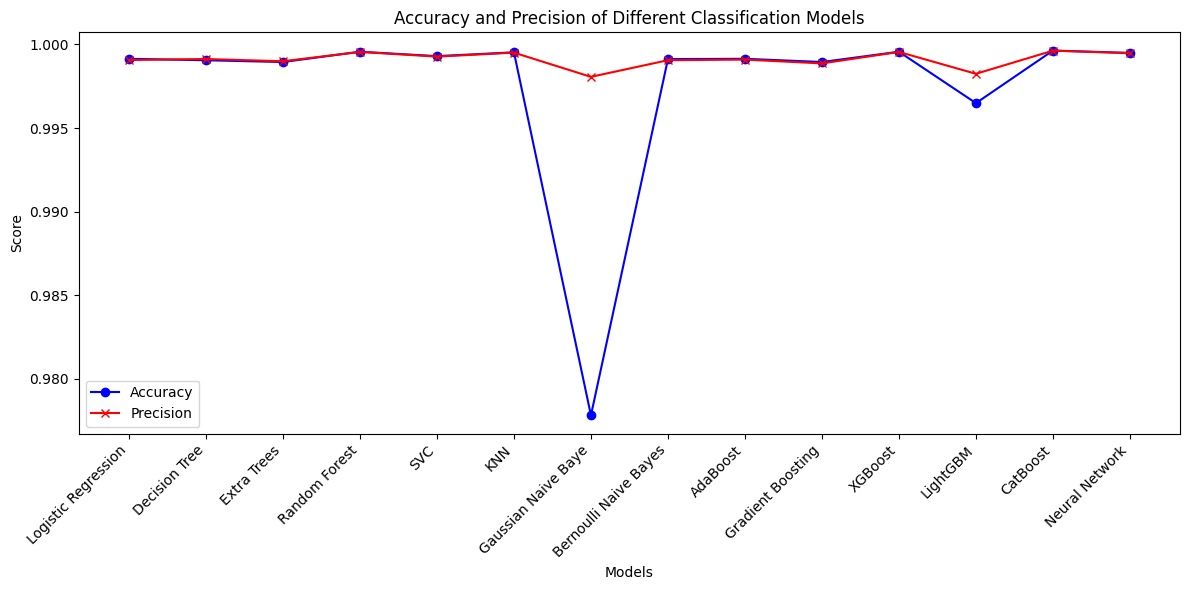

In [15]:
# Assuming 'results' dictionary is already populated from the previous code
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
precisions = [results[model]['precision'] for model in model_names]

plt.figure(figsize=(12, 6))

# Plot accuracies
plt.plot(model_names, accuracies, marker='o', label='Accuracy', color='blue')

# Plot precisions
plt.plot(model_names, precisions, marker='x', label='Precision', color='red')


plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Accuracy and Precision of Different Classification Models")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:

# Example of new data (replace with your actual data)
new_data = pd.DataFrame({
    'Time': [172792],  # Example Time value
    'V1': [-1.3598071336738],
    'V2': [-0.0727811733098497],
    'V3': [2.53634673796914],
    'V4': [1.37815522427443],
    'V5': [-0.338320776994299],
    'V6': [0.462387777762292],
    'V7': [0.239598554061257],
    'V8': [0.0986979012610507],
    'V9': [0.363786969611213],
    'V10': [0.090794171978931],
    'V11': [0.551600473298578],
    'V12': [-0.617800855762348],
    'V13': [-0.991389847235408],
    'V14': [-0.311169353699879],
    'V15': [1.46817697209427],
    'V16': [-0.470400525259478],
    'V17': [0.207971241929242],
    'V18': [0.025790580198559],
    'V19': [0.403992960255733],
    'V20': [0.251412098239705],
    'V21': [-0.018306777944153],
    'V22': [0.277837575558899],
    'V23': [-0.110473910188767],
    'V24': [0.0669280749146741],
    'V25': [0.128539358273528],
    'V26': [-0.189114843888824],
    'V27': [0.133558376740387],
    'V28': [-0.0210530534538215],
    'Amount': [149.62]
})


# Scale the new data using the same scaler used for training
new_data['Amount'] = scaler.transform(new_data['Amount'].values.reshape(-1, 1))
new_data['Time'] = scaler.transform(new_data['Time'].values.reshape(-1, 1))


In [18]:

# Load all saved models and make predictions
loaded_models = {}
predictions = {}

for model_name in os.listdir(models_dir):
    if model_name.endswith(".joblib"):
        model_path = os.path.join(models_dir, model_name)
        model_name = model_name[:-7]  # Remove ".joblib" extension
        loaded_models[model_name] = joblib.load(model_path)
        predictions[model_name] = loaded_models[model_name].predict(new_data)

# Print predictions for each model
for model_name, prediction in predictions.items():
    print(f"Predictions from {model_name}: {prediction}")

Predictions from Gaussian Naive Baye: [0]
Predictions from LightGBM: [0]
Predictions from AdaBoost: [0]
Predictions from KNN: [0]
Predictions from Random Forest: [0]
Predictions from Bernoulli Naive Bayes: [0]
Predictions from Extra Trees: [0]
Predictions from SVC: [0]
Predictions from Logistic Regression: [0]
Predictions from Neural Network: [0]
Predictions from XGBoost: [0]
Predictions from Decision Tree: [0]
Predictions from CatBoost: [0]
Predictions from Gradient Boosting: [0]
